<a href="https://colab.research.google.com/github/dinhsyhao/AI-Berkeley/blob/master/ch02/k_armed_bandit_(nonstationary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k=10

In [67]:
class Bandit:
    def __init__(self, k, mu=0, sigma=1, stationary=True):
        self.k = k
        self.mu = mu
        self.sigma = sigma
        self.stationary = stationary
        self.values = [0] * k # will reset later
        self.optimal_action = 0 # will reset later
        self.actions = list(range(k))
        self.reset()
    
    def step(self, action):
        if not self.stationary:
            self.values += np.random.randn(self.k) * 0.01
       
        self.optimal_action = np.argmax(self.values) # necessary in case the values changes
        return np.random.randn() + self.values[action]
    
    def reset(self):
        if self.stationary:
            self.values = np.random.normal(self.mu, self.sigma, self.k)
        else:
            # nonstationary case init values all equal
            self.values = [np.random.normal(self.mu, self.sigma)] * self.k
        self.optimal_action = np.argmax(self.values)

In [68]:
def select_action(bandit, Qs, epsilon=0.1):
    greedy_action = np.argmax(Qs)
    actions = list(range(k))
    del actions[greedy_action]
    if np.random.random() < epsilon: action = np.random.choice(actions) # epsilon times act randomly
    else: action = greedy_action # 1-epsilon times act greedily

    return action, action == bandit.optimal_action

In [75]:
bandit = Bandit(k, stationary=False)
bandit.values

[0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217,
 0.6270319427699217]

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f25d35cef28>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f25d35792e8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f25d35ceef0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f25d356ae10>}

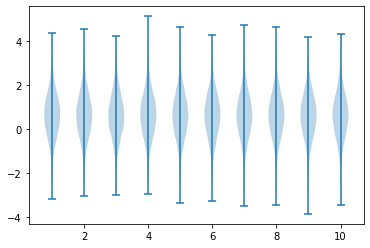

In [76]:
plt.violinplot(np.random.randn(20000, 10) + bandit.values)

In [81]:
def simulate(bandit, times, runs, epsilon, sample_average=True, alpha=0.1):
    rewards = np.zeros(times)
    optimal_action = np.zeros(times)

    for r in range(runs):
        Qs = [0] * k
        Ns = [0] * k # for sample average
        bandit.reset()

        for t in range(times):
            action, is_optimal = select_action(bandit, Qs, epsilon)
            r = bandit.step(action)
            
            Ns[action] += 1 # for sample average case
            if sample_average: Qs[action] += 1/Ns[action] * (r - Qs[action])
            else: Qs[action] += alpha * (r - Qs[action])

            rewards[t] += r
            optimal_action[t] += is_optimal

    return rewards/runs, optimal_action/runs

In [83]:
rewards, optimal_action = simulate(bandit, 1000, 10000, 0.1, sample_average=True)

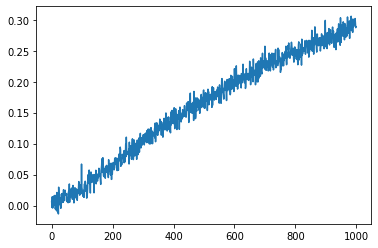

In [84]:
plt.plot(rewards)

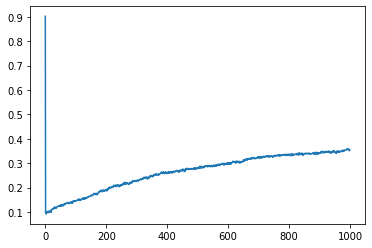

In [85]:
plt.plot(optimal_action)

In [86]:
rewards, optimal_action = simulate(bandit, 1000, 10000, 0.1, sample_average=False, alpha=0.1)

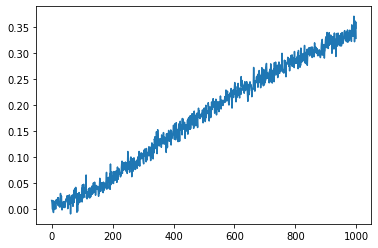

In [87]:
plt.plot(rewards)

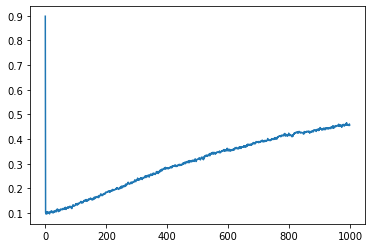

In [88]:
plt.plot(optimal_action)